<font size = "20"> Spotify Music Analysis </font>

In this project, we will attempt to analyze Spotify playlists to see how compatible two user's playlists are. We will also use content-based filtering to create a recommendation system. 

In [1]:
# All imports are listed here
import requests
import spotipy.util as util
import spotipy
import pandas as pd
import matplotlib.pyplot
from spotipy.oauth2 import SpotifyClientCredentials
from spotipy.oauth2 import SpotifyOAuth
from json.decoder import JSONDecodeError

The first step in the process is to authenticate with the Spotify API and then import both of our playlists. The songs of both playlists are printed below

In [2]:
# Authentication with Spotify API
sp = spotipy.Spotify()
cid ="9eab3f44cb5f42bd9d144ff2e2ad767f"
secret = "677567e07a1c4d9980adc0da6868b316"
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
sp.trace=False # What is this?

# This is Shubham's playlist
playlist = sp.user_playlist("1232443238", "5XpKz5MtjD6Vxh8mN3fhK7")
songs = playlist["tracks"]["items"]
ids = []

# This is Jorge's playlist
playlist2 = sp.user_playlist('jorgevicencio87', '1lbwjOlw40jDMvgmpbUlxL')
songs2 = playlist2["tracks"]["items"]
ids2 = []



In [75]:
# Printing out playlist name and total tracks
print('Playlist Name:', playlist['name'], '(Shubhams Playlist)')
print('Total Tracks:', playlist['tracks']['total'])

# Obtain tracks from Shubham's playlist
results = sp.user_playlist("1232443238", playlist['id'], fields="tracks,next")
tracks = results['tracks']

# Print out all tracks from Shubham's playlist using a counter
counter = 1
for i in results['tracks']['items']:
    print(counter, i['track']['artists'][0]['name'] + ' - ' + i['track']['name'])
    counter = counter + 1
print('')
# Print out Jorge's playlist name and total tracks   
print('Playlist Name:', playlist2['name'], '(Jorges Playlist)')
print('Total Tracks:', playlist2['tracks']['total'])


# Obtain tracks from Jorge's playlist
results2 = sp.user_playlist("jorgevicencio87", playlist2['id'], fields="tracks,next")
tracks = results2['tracks']

# Print out all tracks from Jorge's playlist using a counter
counter = 1
for i in results2['tracks']['items']:
    print(counter, i['track']['artists'][0]['name'] + ' - ' + i['track']['name'])
    counter = counter + 1




Playlist Name: Epic Songs (Shubhams Playlist)
Total Tracks: 45
1 Jimi Hendrix - All Along the Watchtower
2 The Rolling Stones - Gimme Shelter
3 Ten Years After - I'd Love To Change The World
4 Nena - 99 Luftballons
5 Ray Charles - Hit the Road Jack
6 The Mamas & The Papas - California Dreamin'
7 The Cars - Just What I Needed
8 Neil Young - Heart of Gold - 2009 Remaster
9 Kyu Sakamoto - Sukiyaki
10 Bob Dylan - Don't Think Twice, It's All Right
11 The Beatles - While My Guitar Gently Weeps - Remastered 2009
12 Massive Attack - Paradise Circus
13 Fleetwood Mac - The Chain - 2004 Remaster
14 Guns N' Roses - Sweet Child O' Mine
15 Men At Work - Down Under
16 New Order - Bizarre Love Triangle
17 The Cranberries - Zombie
18 Brigitte Bardot - Bonnie And Clyde
19 Johnny Cash - Hurt
20 Led Zeppelin - Stairway to Heaven - Remaster
21 Mary Hopkin - Those Were The Days - Remastered
22 Lynyrd Skynyrd - Free Bird
23 Derek & The Dominos - Layla
24 Mazzy Star - Fade Into You
25 Gorillaz - Feel Good Inc

For the next step, we want to find out what the feature values are for each song in every playlist. Before the values are manipluated, for both playlists we will first normalize all of the numerical values and then find the average value for the entire playlist

In [4]:
# Prints out all feature values in Shubham's Playlist
for i in range(len(songs)):
    ids.append(songs[i]["track"]["id"])
features = sp.audio_features(ids)

# Print out all feature Playlists in Jorge's Playlist
for i in range(len(songs2)):
    ids2.append(songs2[i]["track"]["id"])
features2 = sp.audio_features(ids2)

# Converting to dataframe and print
df = pd.DataFrame(features)
df2 = pd.DataFrame(features2)

In [5]:
# Normalizing step for the 13 numeric columns? (Shubham's playlist)
norm = df.copy()
music1mean = []
for col in df:
    if (df[col].dtype != 'object'):
        norm[col] = norm[col] /norm[col].abs().max()
        music1mean.append([norm[col].mean(),col])
        

# Normalizing step for Jorge's Playlist 
norm = df2.copy()
music2mean = []
for col in df2:
    if (df[col].dtype != 'object'):
        norm[col] = norm[col] /norm[col].abs().max()
        music2mean.append([norm[col].mean(),col])
music1mean

[[0.6447161097527845, 'danceability'],
 [0.6563350785340313, 'energy'],
 [0.5010101010101009, 'key'],
 [-0.4888329593860761, 'loudness'],
 [0.5111111111111111, 'mode'],
 [0.22649291266575225, 'speechiness'],
 [0.3173055555555556, 'acousticness'],
 [0.1275048436068577, 'instrumentalness'],
 [0.2705600870038064, 'liveness'],
 [0.5325726141078838, 'valence'],
 [0.6840859832564179, 'tempo'],
 [0.4553031775421547, 'duration_ms'],
 [0.9833333333333333, 'time_signature']]

In [6]:
music2mean

[[0.7738098036910781, 'danceability'],
 [0.6816995170343297, 'energy'],
 [0.5125725338491296, 'key'],
 [-0.46842381233085045, 'loudness'],
 [0.5957446808510638, 'mode'],
 [0.35939544171314464, 'speechiness'],
 [0.24403124047632482, 'acousticness'],
 [0.035702226884533755, 'instrumentalness'],
 [0.2197935226915418, 'liveness'],
 [0.568341191393629, 'valence'],
 [0.7109782958647016, 'tempo'],
 [0.5485724129851628, 'duration_ms'],
 [1.0, 'time_signature']]

Here, we will find the difference between each of the feature values and then graph it

Text(0.5, 0, 'Feature')

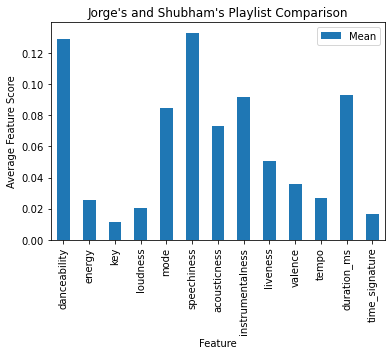

In [7]:
# First, need to convert lists to dataframe
columns = []
pl_data1 = []
pl_data2 = []
for tup in music1mean:
    pl_data1.append(tup[0])
    columns.append(tup[1])
for tup in music2mean:
    pl_data2.append(tup[0])
    
    
df = pd.DataFrame(pl_data1, columns=['Mean'])
df2 = pd.DataFrame(pl_data2, columns=['Mean'])
df3 = df2-df
df3 = df3.abs()
# Next, ned to graph
chart = df3.plot.bar()
chart.set_xticklabels(columns)
chart.set_title('Jorge\'s and Shubham\'s Playlist Comparison')
chart.set_ylabel('Average Feature Score')
chart.set_xlabel('Feature')

In the chart above the closer a value is to zero the more similar they are. As can be seen here our music taste from the sample playlist is quite differnt. However, if we examine the chart further we can see that we like music in a similar key, and we also like music with a similar length, liveness, and tempo. Every other column seems to have a big difference.

In [ ]:
# TODO: Make artist graphic

Using the information we have gathered we will now develop a list of reccomendations for each playlist. Each set of recommendations will be unique to a playlist and will group five songs and artists together until there are none left in order to generate the best recommendations for that particular playlist. 

In [79]:
artists = []
print('Recommendations for Jorge: ')
for song in results2['tracks']['items']:
    if len(artists) < 5:
        artists.append(song['track']['artists'][0]['id'])
    else:
        rec = sp.recommendations(artists, limit=5)
        for title in rec['tracks']:
            print(title['name'], '-', title['artists'][0]['name'])
        artists.clear()
        
print('\n')

artists = []
print('Recommendations for Shubham: ')
for song in results['tracks']['items']:
    if len(artists) < 5:
        artists.append(song['track']['artists'][0]['id'])
    else:
        rec = sp.recommendations(artists, limit=5)
        for title in rec['tracks']:
            print(title['name'], '-', title['artists'][0]['name'])
        artists.clear()

Recommendations for Jorge: 
Por Mi Reggae Muero 2020 - Yandel
Tequila Shots - Kid Cudi
A Tu Merced - Bad Bunny
3G (feat. Jon Z, Don Chezina, Chencho Corleone & Myke Towers) - Remix - Wisin
Gasolina - Daddy Yankee
The Count (feat. Wiz Khalifa) - Curren$y
All Night - The Vamps
Se Le Ve - Sech
Finesse - Remix; feat. Cardi B - Bruno Mars
3 Headed Goat (feat. Lil Baby & Polo G) - Lil Durk
Smoke A Nigga (feat. Wiz Khalifa) - Juicy J
Sixteen - Rick Ross
Desenfocao' - Rauw Alejandro
Travesuras - Remix - Nio Garcia
0 Sentimientos (Remix) [feat. Noriel, Darkiel, Lyan, Messiah & Baby Rasta] - Jon Z
I THINK - Tyler, The Creator
Rompe - Daddy Yankee
Velitas - Darell
Take a Picture - Filter
WHATS POPPIN (feat. DaBaby, Tory Lanez & Lil Wayne) - Remix - Tory Lanez
Kush - Lenny Tavárez
Virtual (Blue Balenciagas) - YNW Melly
Fútbol & Rumba (feat. Enrique Iglesias) - Anuel AA
No Te Hagas - Jory Boy
Outside Today - YoungBoy Never Broke Again
Mala Costumbre - Manuel Turizo
Enemies - Shinedown
Nobody Prayin